In [1]:
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft
from findiff import FinDiff
import matplotlib.patches as mpatches
from numpy.lib.type_check import common_type
from unidecode import unidecode
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df0=pd.read_csv("rspk0.csv")     # T = 0 years
df25=pd.read_csv("rspk250.csv")   # T = 0.5 years
df50=pd.read_csv("rspk500.csv")   # T = 1 year
df75=pd.read_csv("rspk750.csv")   # T = 1.5 years
df99=pd.read_csv("rspk999.csv")   # T = 2 yeras

In [3]:
r_theta0 = df0.iloc[:,1]
tau_theta0 = df0.iloc[:,2]
kappa_theta0 = df0.iloc[:,3]
theta_indices0 = np.sort(df0.iloc[:,0])
pdgf_theta0 = df0.iloc[:,4]

In [4]:
r_theta25 = df25.iloc[:,1]
tau_theta25 = df25.iloc[:,2]
kappa_theta25 = df25.iloc[:,3]
theta_indices25 = np.sort(df25.iloc[:,0])
pdgf_theta25 = df25.iloc[:,4]

In [5]:
r_theta50 = df50.iloc[:,1]
tau_theta50 = df50.iloc[:,2]
kappa_theta50 = df50.iloc[:,3]
theta_indices50 = np.sort(df50.iloc[:,0])
pdgf_theta50 = df50.iloc[:,4]

In [6]:
r_theta75 = df75.iloc[:,1]
tau_theta75 = df75.iloc[:,2]
kappa_theta75 = df75.iloc[:,3]
theta_indices75 = np.sort(df75.iloc[:,0])
pdgf_theta75 = df75.iloc[:,4]

In [7]:
r_theta99 = df99.iloc[:,1]
tau_theta99 = df99.iloc[:,2]
kappa_theta99 = df99.iloc[:,3]
theta_indices99 = np.sort(df99.iloc[:,0])
pdgf_theta99 = df99.iloc[:,4]

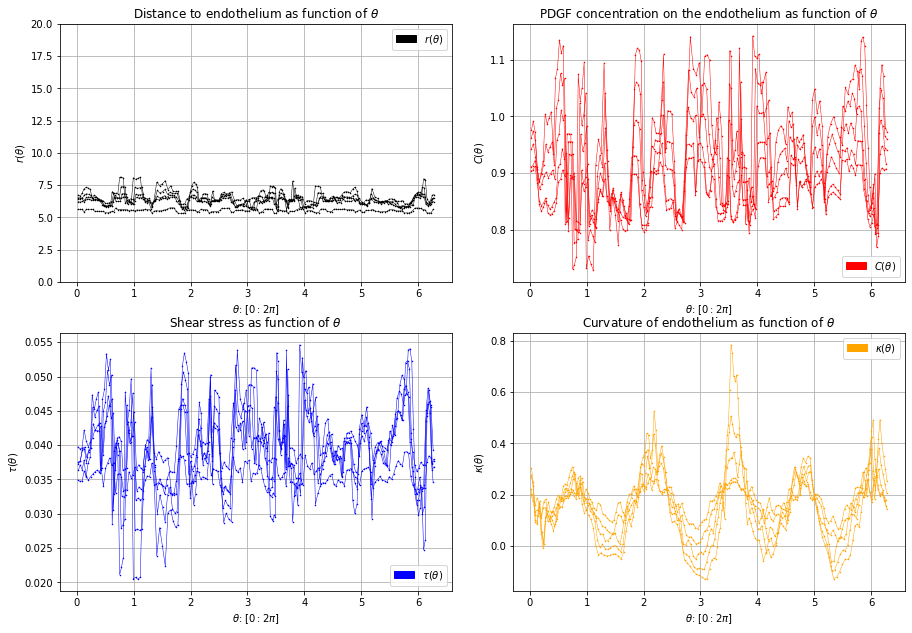

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta25, color='black', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta50, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta75, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta99, color='black', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='black', label='$r(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[0,0].legend(handles=[pop_b])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
ax[0,0].set_ylim([0,20])
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta0, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta25, color='red', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta75, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta99, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='red', label='$C(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[0,1].legend(handles=[pop_b])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, tau_theta0, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, tau_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,0].plot(theta_indices50, tau_theta50, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, tau_theta75, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, tau_theta99, color='blue', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='blue', label='$\\tau(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[1,0].legend(handles=[pop_b])
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_theta0, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_theta25, color='orange', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_theta50, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_theta75, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
y0 = r_theta0
x25 = theta_indices25
y25 = r_theta25
x50 = theta_indices50
y50 = r_theta50
x75 = theta_indices75
y75 = r_theta75
x99 = theta_indices99
y99 = r_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
sp0 = csaps(x0, y0, smooth=0.99)
sp25 = csaps(x25, y25, smooth=0.99)
sp50 = csaps(x50, y50, smooth=0.99)
sp75 = csaps(x75, y75, smooth=0.99)
sp99 = csaps(x99, y99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ys0 = sp0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ys25 = sp25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ys50 = sp50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ys75 = sp75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ys99 = sp99(xs99)


#plt.plot(x0, y0, 'o', xs0, ys0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

Smoothing $\\Tau(\\theta)$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
s0 = tau_theta0
x25 = theta_indices25
s25 = tau_theta25
x50 = theta_indices50
s50 = tau_theta50
x75 = theta_indices75
s75 = tau_theta75
x99 = theta_indices99
s99 = tau_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
sh0 = csaps(x0, s0, smooth=0.99)
sh25 = csaps(x25, s25, smooth=0.99)
sh50 = csaps(x50, s50, smooth=0.99)
sh75 = csaps(x75, s75, smooth=0.99)
sh99 = csaps(x99, s99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ss0 = sh0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ss25 = sh25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ss50 = sh50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ss75 = sh75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ss99 = sh99(xs99)

shear_theta0 = ss0
shear_theta25 = ss25
shear_theta50 = ss50
shear_theta75 = ss75
shear_theta99 = ss99


#plt.plot(xs0, ss0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

Smoothing pdgf

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
p0 = pdgf_theta0
x25 = theta_indices25
p25 = pdgf_theta25
x50 = theta_indices50
p50 = pdgf_theta50
x75 = theta_indices75
p75 = pdgf_theta75
x99 = theta_indices99
p99 = pdgf_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
ph0 = csaps(x0, p0, smooth=0.99)
ph25 = csaps(x25, p25, smooth=0.99)
ph50 = csaps(x50, p50, smooth=0.99)
ph75 = csaps(x75, p75, smooth=0.99)
ph99 = csaps(x99, p99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ps0 = ph0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ps25 = ph25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ps50 = ph50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ps75 = ph75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ps99 = ph99(xs99)

pdgf_theta_new0 = ps0
pdgf_theta_new25 = ps25
pdgf_theta_new50 = ps50
pdgf_theta_new75 = ps75
pdgf_theta_new99 = ps99


#plt.plot(xs0, ss0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

In [12]:
r_theta_new0 = ys0
r_theta_new_p0 = np.gradient(ys0,theta_indices0)
r_theta_new_2p0 = np.gradient(r_theta_new_p0,theta_indices0)

num0 = (r_theta_new0**2)+2*(r_theta_new_p0**2)-(r_theta_new0*(r_theta_new_2p0))
den0 = (r_theta_new0**2 + r_theta_new_p0**2)**(1.5)
    
kappa_new_0 = num0/den0

#****************************

r_theta_new25 = ys25
r_theta_new_p25 = np.gradient(ys25,theta_indices25)
r_theta_new_2p25 = np.gradient(r_theta_new_p25,theta_indices25)

num25 = (r_theta_new25**2)+2*(r_theta_new_p25**2)-(r_theta_new25*(r_theta_new_2p25))
den25 = (r_theta_new25**2 + r_theta_new_p25**2)**(1.5)
    
kappa_new_25 = num25/den25

#****************************

r_theta_new50 = ys50
r_theta_new_p50 = np.gradient(ys50,theta_indices50)
r_theta_new_2p50 = np.gradient(r_theta_new_p50,theta_indices50)

num50 = (r_theta_new50**2)+2*(r_theta_new_p50**2)-(r_theta_new50*(r_theta_new_2p50))
den50 = (r_theta_new50**2 + r_theta_new_p50**2)**(1.5)
    
kappa_new_50 = num50/den50

#****************************

r_theta_new75 = ys75
r_theta_new_p75 = np.gradient(ys75,theta_indices75)
r_theta_new_2p75 = np.gradient(r_theta_new_p75,theta_indices75)

num75 = (r_theta_new75**2)+2*(r_theta_new_p75**2)-(r_theta_new75*(r_theta_new_2p75))
den75 = (r_theta_new75**2 + r_theta_new_p75**2)**(1.5)
    
kappa_new_75 = num75/den75

#****************************

r_theta_new99 = ys99
r_theta_new_p99 = np.gradient(ys99,theta_indices99)
r_theta_new_2p99 = np.gradient(r_theta_new_p99,theta_indices99)

num99 = (r_theta_new99**2)+2*(r_theta_new_p99**2)-(r_theta_new99*(r_theta_new_2p99))
den99 = (r_theta_new99**2 + r_theta_new_p99**2)**(1.5)
    
kappa_new_99 = num99/den99

#****************************

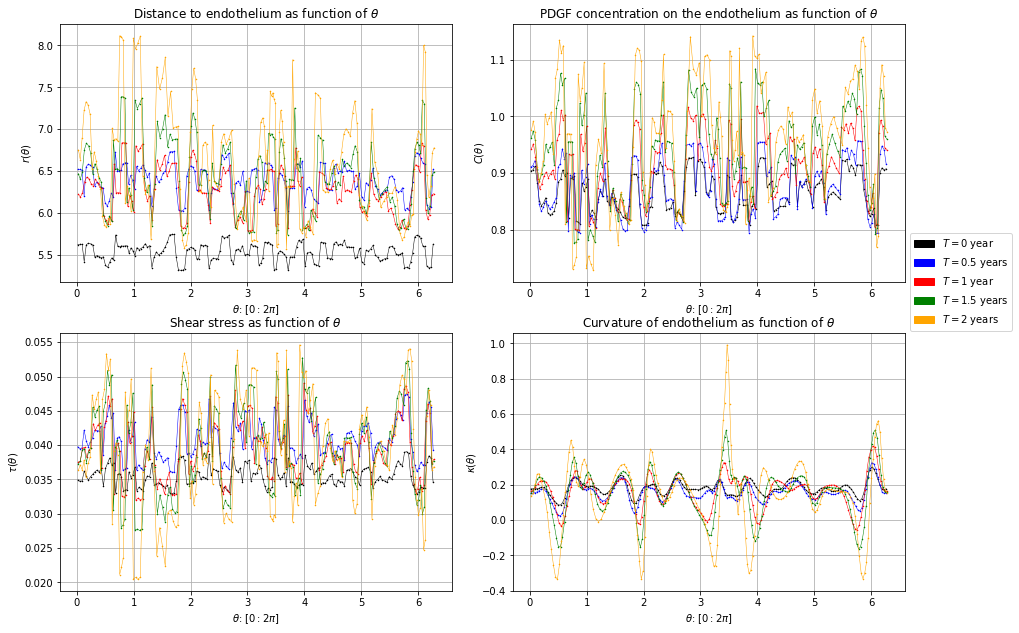

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='orange', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='orange', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=1.5$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, tau_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, tau_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,0].plot(theta_indices50, tau_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, tau_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, tau_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()

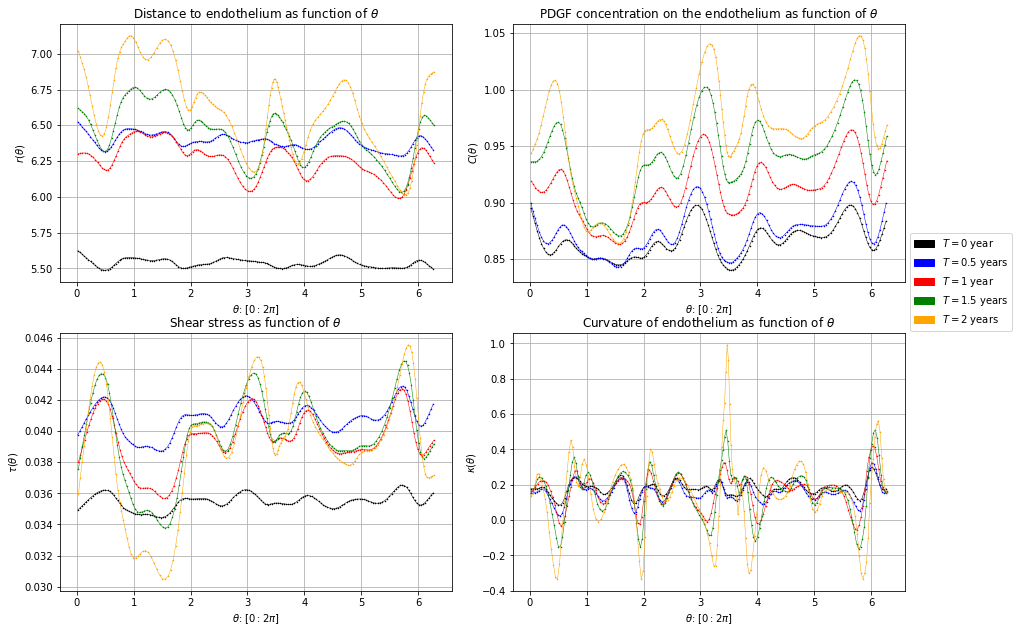

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='orange', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='orange', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=1.5$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,0].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()

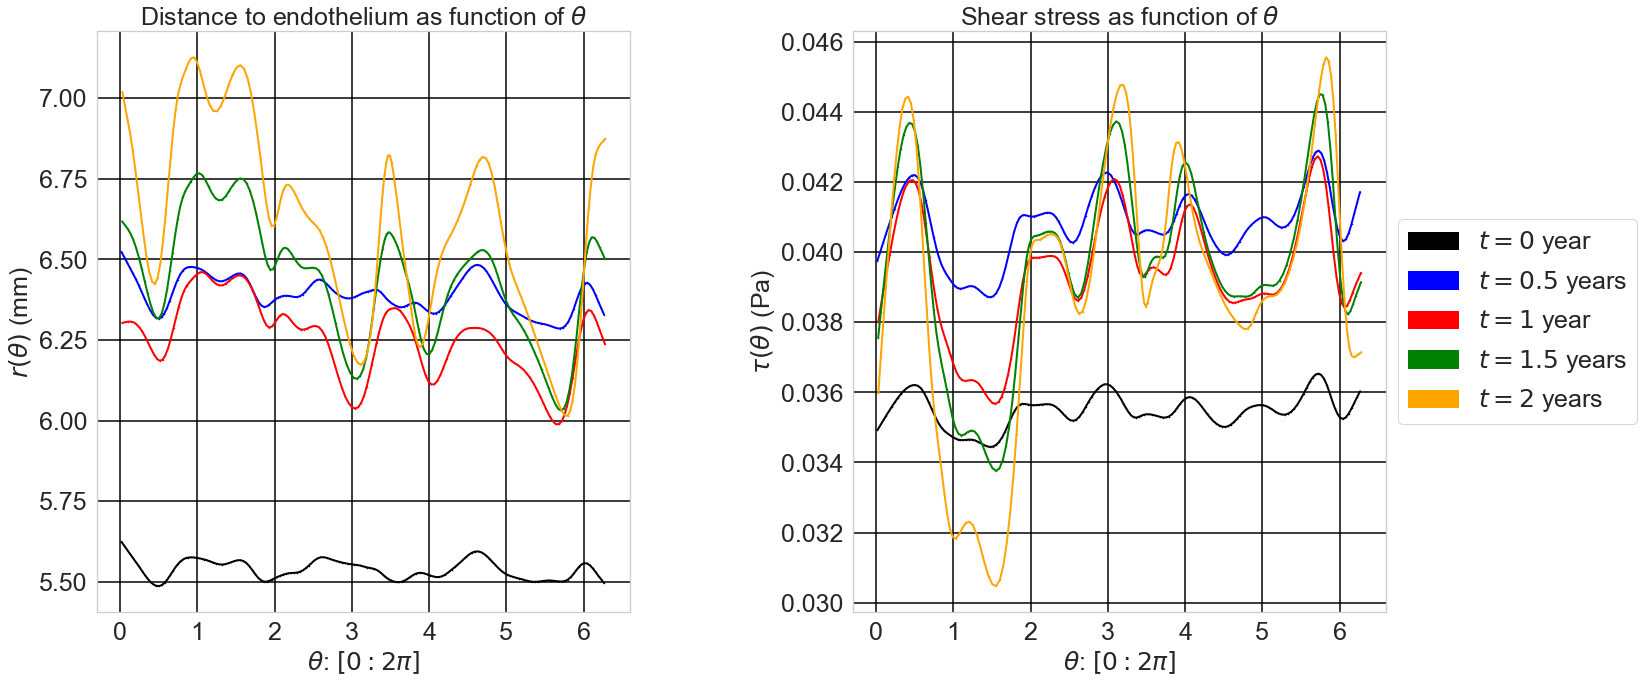

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$t=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$t=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$t=1$ year')
pop_d = mpatches.Patch(color='green', label = '$t=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$t=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('CS2_rthetavstautheta', bbox_inches='tight',dpi=85)

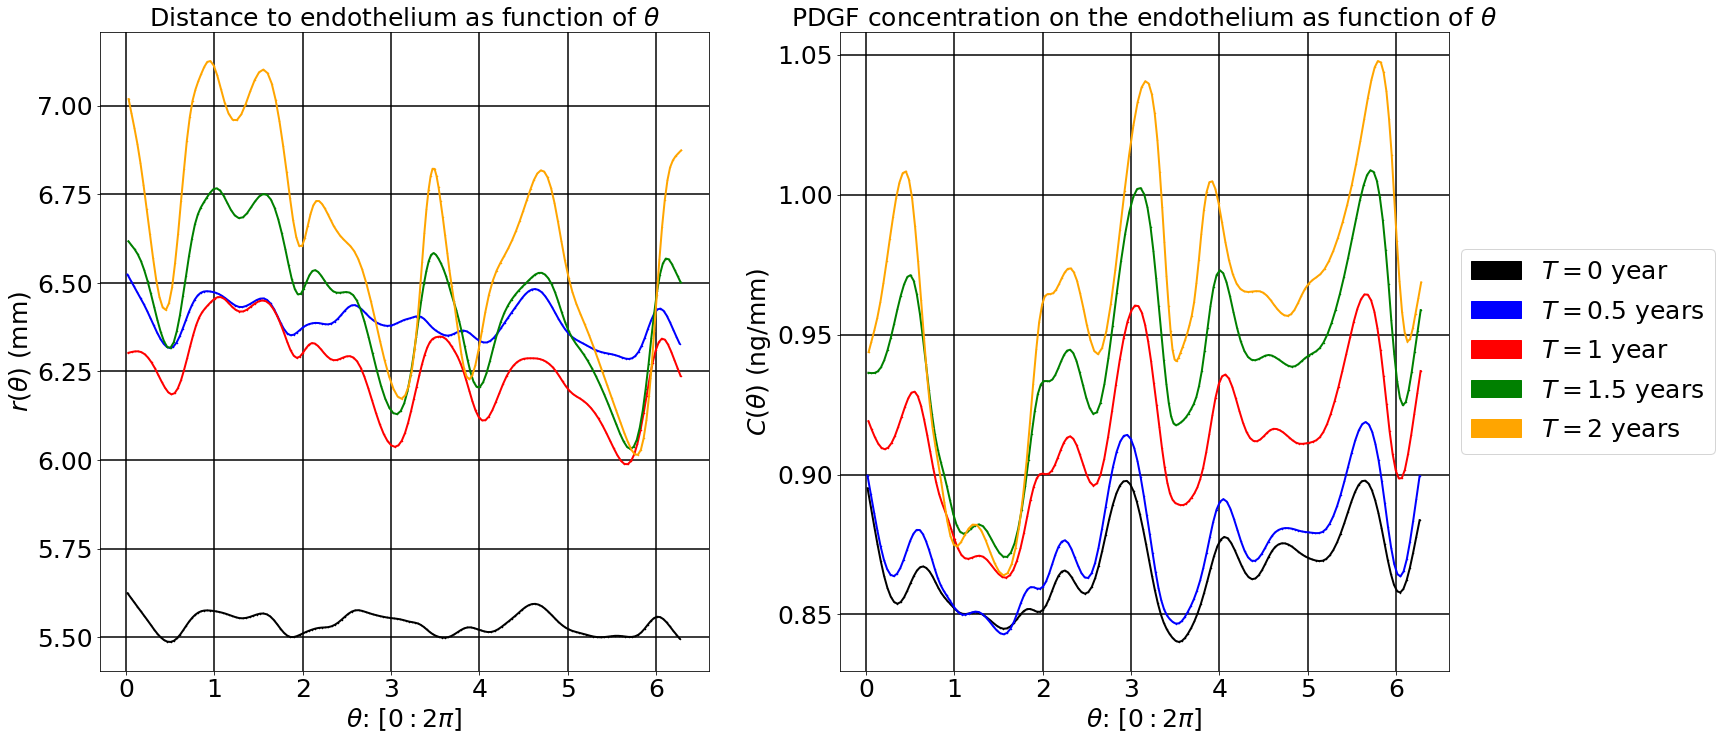

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$C(\\theta)$ (ng/mm)',fontsize=25)
ax[1].set_title('PDGF concentration on the endothelium as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('cs2rthetavspdgftheta', bbox_inches='tight',dpi=85)

In [17]:
df0['reg_kappa_theta'] = kappa_new_0
df25['reg_kappa_theta'] = kappa_new_25
df50['reg_kappa_theta'] = kappa_new_50
df75['reg_kappa_theta'] = kappa_new_75
df99['reg_kappa_theta'] = kappa_new_99

df99

theta_indices  r_indices  tau_indices  kappa_theta  pdgf_theta  \
0         0.030325   6.753178     0.036383     0.302253    0.975965   
1         0.061587   6.637913     0.037132     0.248235    0.991473   
2         0.095047   6.900129     0.036425     0.092920    0.972050   
3         0.129558   7.228507     0.037826     0.085086    0.911104   
4         0.164109   7.329213     0.035346     0.168137    0.883641   
..             ...        ...          ...          ...         ...   
164       6.156486   6.457782     0.044202     0.491713    1.049559   
165       6.187958   6.188835     0.048070     0.401735    1.090982   
166       6.218294   6.321008     0.045849     0.350834    1.071738   
167       6.250216   6.720788     0.036439     0.300267    0.979524   
168       6.281786   6.781456     0.036883     0.251855    0.973066   

     reg_kappa_theta  
0           0.136126  
1           0.151138  
2           0.202512  
3           0.258348  
4           0.263005  
..               ...  
164         0.501169  
165         0.350832  
166         0.229932  
167         0.170059  
168         0.151658  

[169 rows x 6 columns]

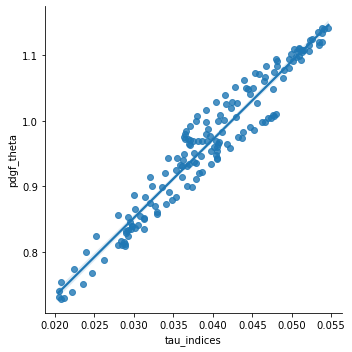

In [18]:
sns.lmplot(data = df99, x="tau_indices", y="pdgf_theta")
plt.ticklabel_format(useOffset=False)

In [19]:
df0.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000  -0.071250     0.087174     0.069644   
r_indices            -0.071250   1.000000    -0.769517     0.014212   
tau_indices           0.087174  -0.769517     1.000000    -0.012391   
kappa_theta           0.069644   0.014212    -0.012391     1.000000   
pdgf_theta            0.165338  -0.406478     0.706425    -0.174031   
reg_kappa_theta       0.144281   0.672784    -0.606457     0.094877   

                 pdgf_theta  reg_kappa_theta  
theta_indices      0.165338         0.144281  
r_indices         -0.406478         0.672784  
tau_indices        0.706425        -0.606457  
kappa_theta       -0.174031         0.094877  
pdgf_theta         1.000000        -0.335571  
reg_kappa_theta   -0.335571         1.000000

In [20]:
df25.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000  -0.121564     0.102117     0.063426   
r_indices            -0.121564   1.000000    -0.855006     0.039836   
tau_indices           0.102117  -0.855006     1.000000    -0.008377   
kappa_theta           0.063426   0.039836    -0.008377     1.000000   
pdgf_theta            0.162829  -0.712851     0.829565    -0.154681   
reg_kappa_theta       0.130533   0.671176    -0.648006     0.131390   

                 pdgf_theta  reg_kappa_theta  
theta_indices      0.162829         0.130533  
r_indices         -0.712851         0.671176  
tau_indices        0.829565        -0.648006  
kappa_theta       -0.154681         0.131390  
pdgf_theta         1.000000        -0.534590  
reg_kappa_theta   -0.534590         1.000000

In [21]:
df50.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000  -0.195231     0.080971     0.054730   
r_indices            -0.195231   1.000000    -0.880585     0.177117   
tau_indices           0.080971  -0.880585     1.000000    -0.040642   
kappa_theta           0.054730   0.177117    -0.040642     1.000000   
pdgf_theta            0.161935  -0.960869     0.898319    -0.123272   
reg_kappa_theta       0.064481   0.665473    -0.589804     0.286059   

                 pdgf_theta  reg_kappa_theta  
theta_indices      0.161935         0.064481  
r_indices         -0.960869         0.665473  
tau_indices        0.898319        -0.589804  
kappa_theta       -0.123272         0.286059  
pdgf_theta         1.000000        -0.636528  
reg_kappa_theta   -0.636528         1.000000

In [22]:
df75.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000  -0.197935     0.091705     0.074778   
r_indices            -0.197935   1.000000    -0.892733     0.162953   
tau_indices           0.091705  -0.892733     1.000000    -0.034563   
kappa_theta           0.074778   0.162953    -0.034563     1.000000   
pdgf_theta            0.157652  -0.947841     0.944523    -0.093399   
reg_kappa_theta       0.058711   0.583046    -0.538239     0.295988   

                 pdgf_theta  reg_kappa_theta  
theta_indices      0.157652         0.058711  
r_indices         -0.947841         0.583046  
tau_indices        0.944523        -0.538239  
kappa_theta       -0.093399         0.295988  
pdgf_theta         1.000000        -0.559437  
reg_kappa_theta   -0.559437         1.000000

In [23]:
df99.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000  -0.200460     0.109330     0.077866   
r_indices            -0.200460   1.000000    -0.887511     0.151817   
tau_indices           0.109330  -0.887511     1.000000    -0.027152   
kappa_theta           0.077866   0.151817    -0.027152     1.000000   
pdgf_theta            0.161027  -0.907791     0.967526    -0.059855   
reg_kappa_theta       0.039066   0.401876    -0.378997     0.304601   

                 pdgf_theta  reg_kappa_theta  
theta_indices      0.161027         0.039066  
r_indices         -0.907791         0.401876  
tau_indices        0.967526        -0.378997  
kappa_theta       -0.059855         0.304601  
pdgf_theta         1.000000        -0.377335  
reg_kappa_theta   -0.377335         1.000000

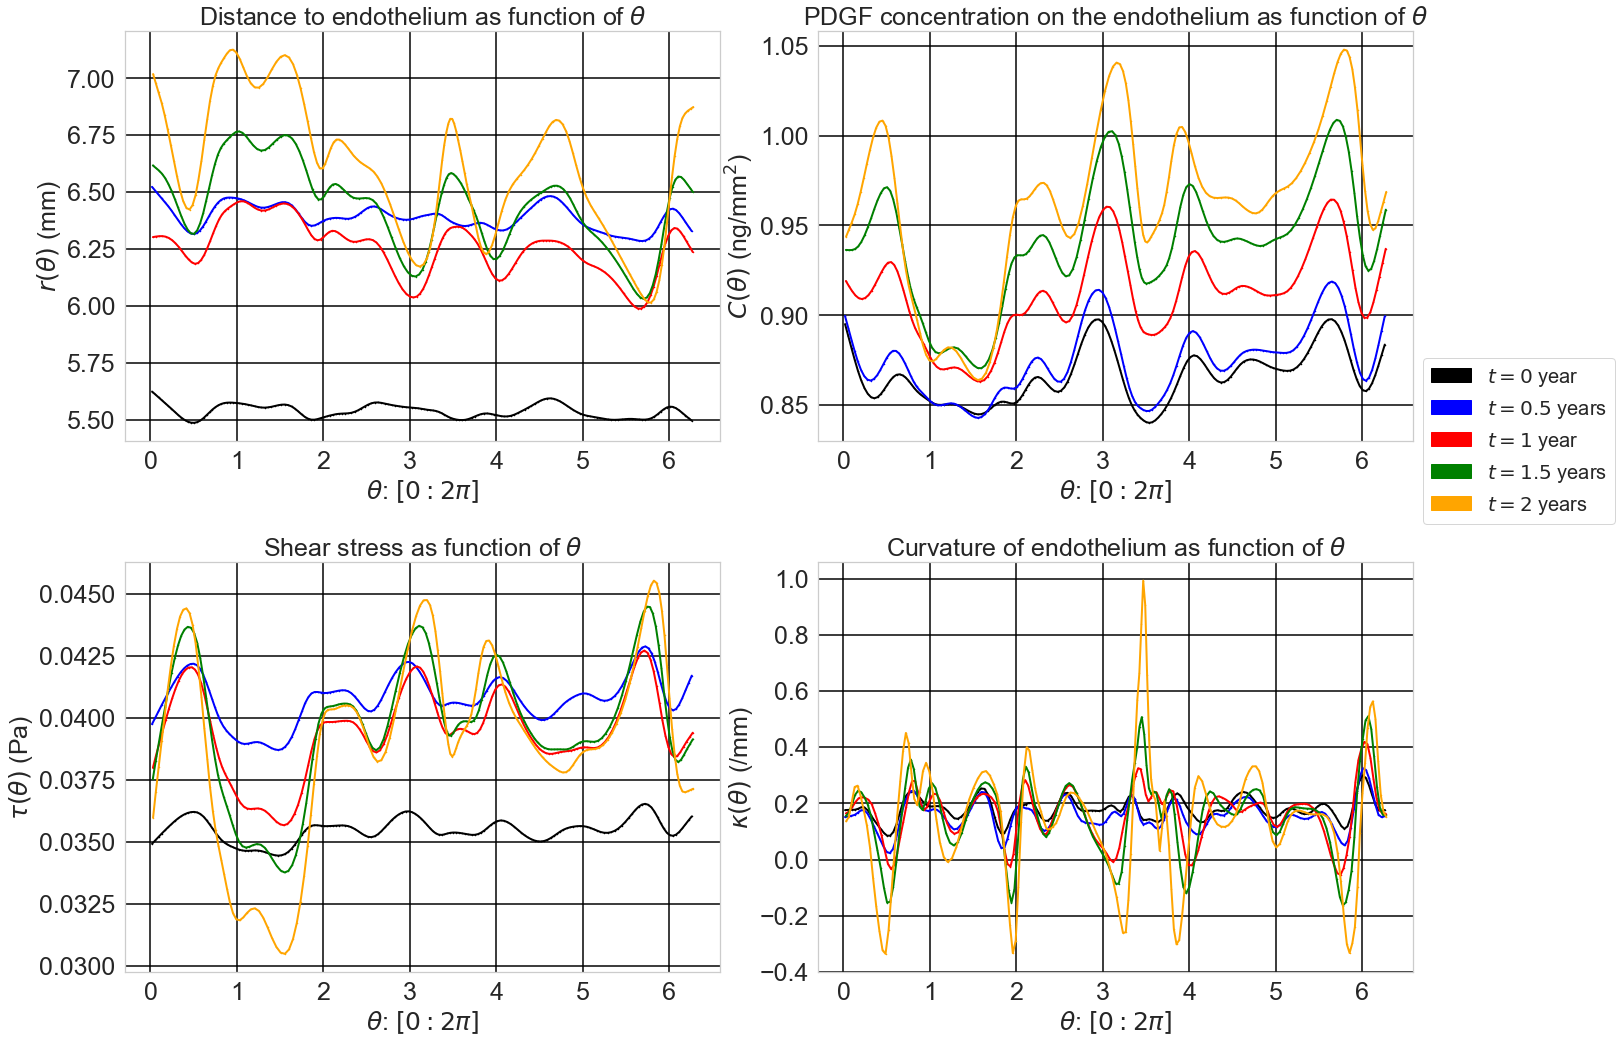

In [51]:
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=5.0)

ax[0,0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0,0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0,0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0,0].grid(color='black',linewidth = 1.5)

ax[0,1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0,1].set_ylabel('$C(\\theta)$ (ng/mm$^{2}$)',fontsize=25)
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$',fontsize=25)
ax[0,1].grid(color='black',linewidth = 1.5)

ax[1,0].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1,0].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$t=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$t=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$t=1$ year')
pop_d = mpatches.Patch(color='green', label = '$t=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$t=2$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1,0].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1,0].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1,0].grid(color='black',linewidth = 1.5)

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=2)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1,1].set_ylabel('$\\kappa(\\theta)$ (/mm)',fontsize=25)
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$',fontsize=25)
ax[1,1].grid(color='black',linewidth = 1.5)
for ax in (ax[0,0], ax[0,1], ax[1,0], ax[1,1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('cs2comparisonplotsregularized', bbox_inches='tight',dpi=90)

In [25]:
d = {'r($\theta$)': pd.Series(r_theta_new0),
   '$\tau$($\theta)$': pd.Series(shear_theta0),
     'C($\theta$)': pd.Series(pdgf_theta_new0),
     '$\kappa$($\theta)$': pd.Series(kappa_new_0)}   
    
# creates Dataframe.
df_reg_0 = pd.DataFrame(d)
  
# print the data.
df_reg_0.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.561403     0.044174   
$\tau$($\theta)$      -0.561403          1.000000     0.625355   
C($\theta$)            0.044174          0.625355     1.000000   
$\kappa$($\theta)$     0.576133         -0.412508    -0.037283   

                    $\kappa$($\theta)$  
r($\theta$)                   0.576133  
$\tau$($\theta)$             -0.412508  
C($\theta$)                  -0.037283  
$\kappa$($\theta)$            1.000000

In [26]:
d25 = {'r($\theta$)': pd.Series(r_theta_new25),
   '$\tau$($\theta)$': pd.Series(shear_theta25),
     'C($\theta$)': pd.Series(pdgf_theta_new25),
     '$\kappa$($\theta)$': pd.Series(kappa_new_25)}   
    
# creates Dataframe.
df_reg_25 = pd.DataFrame(d25)
  
# print the data.
df_reg_25.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.747602    -0.454526   
$\tau$($\theta)$      -0.747602          1.000000     0.752968   
C($\theta$)           -0.454526          0.752968     1.000000   
$\kappa$($\theta)$     0.554231         -0.462022    -0.252270   

                    $\kappa$($\theta)$  
r($\theta$)                   0.554231  
$\tau$($\theta)$             -0.462022  
C($\theta$)                  -0.252270  
$\kappa$($\theta)$            1.000000

In [27]:
d50 = {'r($\theta$)': pd.Series(r_theta_new50),
   '$\tau$($\theta)$': pd.Series(shear_theta50),
     'C($\theta$)': pd.Series(pdgf_theta_new50),
     '$\kappa$($\theta)$': pd.Series(kappa_new_50)}   
    
# creates Dataframe.
df_reg_50 = pd.DataFrame(d50)
df_reg_50.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.838979    -0.948232   
$\tau$($\theta)$      -0.838979          1.000000     0.871528   
C($\theta$)           -0.948232          0.871528     1.000000   
$\kappa$($\theta)$     0.565997         -0.509215    -0.535189   

                    $\kappa$($\theta)$  
r($\theta$)                   0.565997  
$\tau$($\theta)$             -0.509215  
C($\theta$)                  -0.535189  
$\kappa$($\theta)$            1.000000

In [28]:
d75 = {'r($\theta$)': pd.Series(r_theta_new75),
   '$\tau$($\theta)$': pd.Series(shear_theta75),
     'C($\theta$)': pd.Series(pdgf_theta_new75),
     '$\kappa$($\theta)$': pd.Series(kappa_new_75)}   
    
# creates Dataframe.
df_reg_75 = pd.DataFrame(d75)
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.854516    -0.929482   
$\tau$($\theta)$      -0.854516          1.000000     0.933121   
C($\theta$)           -0.929482          0.933121     1.000000   
$\kappa$($\theta)$     0.556539         -0.495339    -0.509774   

                    $\kappa$($\theta)$  
r($\theta$)                   0.556539  
$\tau$($\theta)$             -0.495339  
C($\theta$)                  -0.509774  
$\kappa$($\theta)$            1.000000

In [29]:
d99 = {'r($\theta$)': pd.Series(r_theta_new99),
   '$\tau$($\theta)$': pd.Series(shear_theta99),
     'C($\theta$)': pd.Series(pdgf_theta_new99),
     '$\kappa$($\theta)$': pd.Series(kappa_new_99)}   
    
# creates Dataframe.
df_reg_99 = pd.DataFrame(d99)
  
# print the data.
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.858139    -0.895822   
$\tau$($\theta)$      -0.858139          1.000000     0.968075   
C($\theta$)           -0.895822          0.968075     1.000000   
$\kappa$($\theta)$     0.529923         -0.450429    -0.454103   

                    $\kappa$($\theta)$  
r($\theta$)                   0.529923  
$\tau$($\theta)$             -0.450429  
C($\theta$)                  -0.454103  
$\kappa$($\theta)$            1.000000

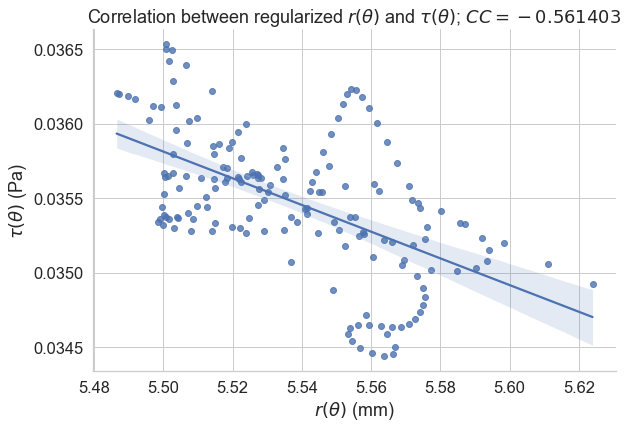

In [30]:
sns.set(font_scale = 1.5)  # 0 year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=-0.561403$')
plt.savefig('cs2rvstauT0', bbox_inches='tight',dpi=300)

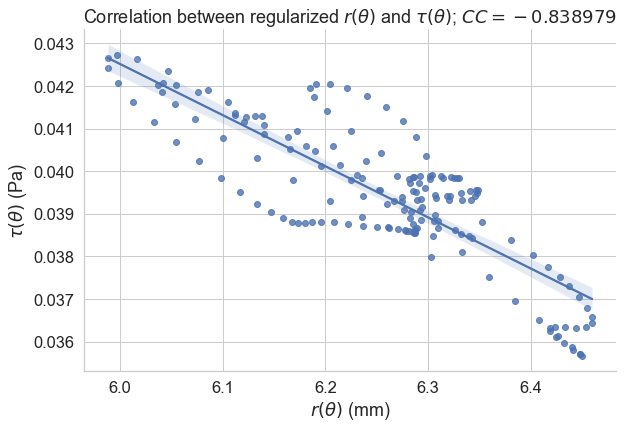

In [31]:
sns.set(font_scale = 1.5)  # 1 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_50, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=-0.838979$')
plt.savefig('cs2rvstauT1', bbox_inches='tight',dpi=300)

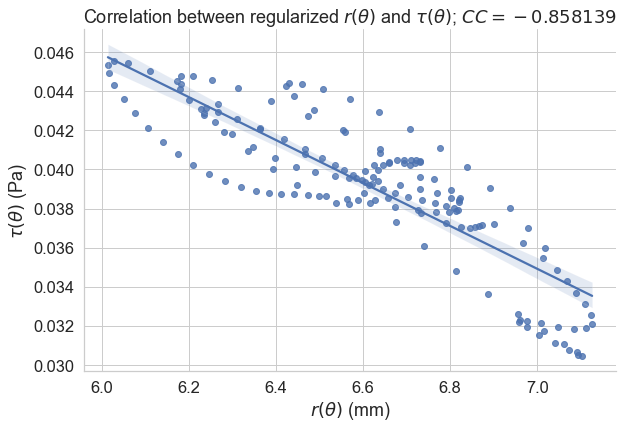

In [32]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=-0.858139$')
plt.savefig('cs2rvstauT2', bbox_inches='tight',dpi=300)

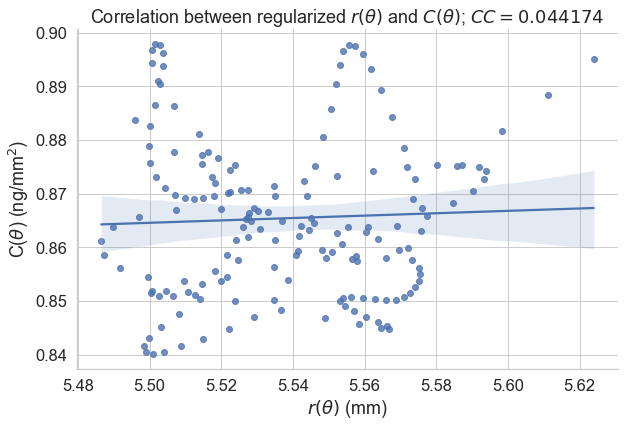

In [33]:
sns.set(font_scale = 1.5)  # 0 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and $C(\\theta)$; $CC=0.044174$')
plt.savefig('cs2rvscT0', bbox_inches='tight',dpi=300)

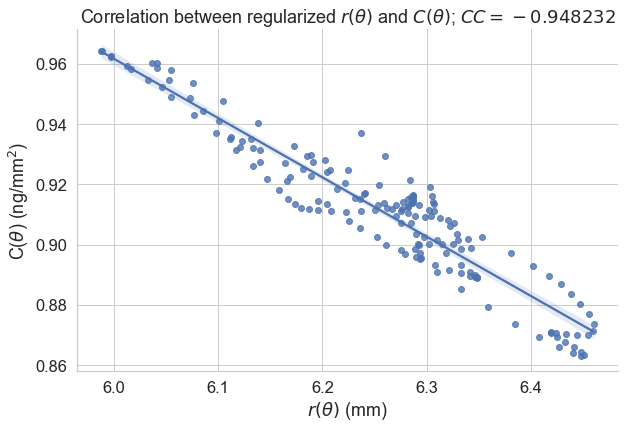

In [34]:
sns.set(font_scale = 1.5)  # 1 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_50, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and $C(\\theta)$; $CC=-0.948232$')
plt.savefig('cs2rvscT1', bbox_inches='tight',dpi=300)

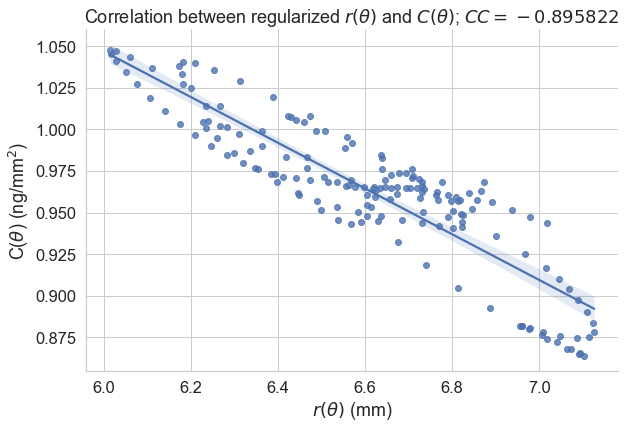

In [35]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and $C(\\theta)$; $CC=-0.895822$')
plt.savefig('cs2rvscT2', bbox_inches='tight',dpi=300)

In [36]:
rvstau = np.array([])
rvsc = np.array([])
tauvsc = np.array([])
rvskappa = np.array([])
tauvskappa = np.array([])
cvskappa = np.array([])

df_reg_0.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.561403     0.044174   
$\tau$($\theta)$      -0.561403          1.000000     0.625355   
C($\theta$)            0.044174          0.625355     1.000000   
$\kappa$($\theta)$     0.576133         -0.412508    -0.037283   

                    $\kappa$($\theta)$  
r($\theta$)                   0.576133  
$\tau$($\theta)$             -0.412508  
C($\theta$)                  -0.037283  
$\kappa$($\theta)$            1.000000

In [37]:
rvstau = np.append(rvstau, -0.561403)
rvsc = np.append(rvsc, 0.044174)
tauvsc = np.append(tauvsc, 0.625355)
rvskappa = np.append(rvskappa, 0.576133)
tauvskappa = np.append(tauvskappa, -0.412508)
cvskappa = np.append(cvskappa, -0.037283)

In [38]:
df_reg_25.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.747602    -0.454526   
$\tau$($\theta)$      -0.747602          1.000000     0.752968   
C($\theta$)           -0.454526          0.752968     1.000000   
$\kappa$($\theta)$     0.554231         -0.462022    -0.252270   

                    $\kappa$($\theta)$  
r($\theta$)                   0.554231  
$\tau$($\theta)$             -0.462022  
C($\theta$)                  -0.252270  
$\kappa$($\theta)$            1.000000

In [39]:
rvstau = np.append(rvstau, -0.747602)
rvsc = np.append(rvsc, -0.454526)
tauvsc = np.append(tauvsc, 0.752968)
rvskappa = np.append(rvskappa, 0.554231)
tauvskappa = np.append(tauvskappa, -0.462022)
cvskappa = np.append(cvskappa, -0.252270)

In [40]:
df_reg_50.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.838979    -0.948232   
$\tau$($\theta)$      -0.838979          1.000000     0.871528   
C($\theta$)           -0.948232          0.871528     1.000000   
$\kappa$($\theta)$     0.565997         -0.509215    -0.535189   

                    $\kappa$($\theta)$  
r($\theta$)                   0.565997  
$\tau$($\theta)$             -0.509215  
C($\theta$)                  -0.535189  
$\kappa$($\theta)$            1.000000

In [41]:
rvstau = np.append(rvstau, -0.838979)
rvsc = np.append(rvsc, -0.948232)
tauvsc = np.append(tauvsc, 0.871528)
rvskappa = np.append(rvskappa, 0.565997)
tauvskappa = np.append(tauvskappa, -0.509215)
cvskappa = np.append(cvskappa, -0.535189)

In [42]:
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.854516    -0.929482   
$\tau$($\theta)$      -0.854516          1.000000     0.933121   
C($\theta$)           -0.929482          0.933121     1.000000   
$\kappa$($\theta)$     0.556539         -0.495339    -0.509774   

                    $\kappa$($\theta)$  
r($\theta$)                   0.556539  
$\tau$($\theta)$             -0.495339  
C($\theta$)                  -0.509774  
$\kappa$($\theta)$            1.000000

In [43]:
rvstau = np.append(rvstau, -0.854516)
rvsc = np.append(rvsc, -0.929482)
tauvsc = np.append(tauvsc, 0.933121)
rvskappa = np.append(rvskappa, 0.556539)
tauvskappa = np.append(tauvskappa, -0.495339)
cvskappa = np.append(cvskappa, -0.509774)

In [44]:
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.858139    -0.895822   
$\tau$($\theta)$      -0.858139          1.000000     0.968075   
C($\theta$)           -0.895822          0.968075     1.000000   
$\kappa$($\theta)$     0.529923         -0.450429    -0.454103   

                    $\kappa$($\theta)$  
r($\theta$)                   0.529923  
$\tau$($\theta)$             -0.450429  
C($\theta$)                  -0.454103  
$\kappa$($\theta)$            1.000000

In [45]:
rvstau = np.append(rvstau, -0.858139)
rvsc = np.append(rvsc, -0.895822)
tauvsc = np.append(tauvsc, 0.968075)
rvskappa = np.append(rvskappa, 0.529923)
tauvskappa = np.append(tauvskappa, -0.450429)
cvskappa = np.append(cvskappa, -0.454103)

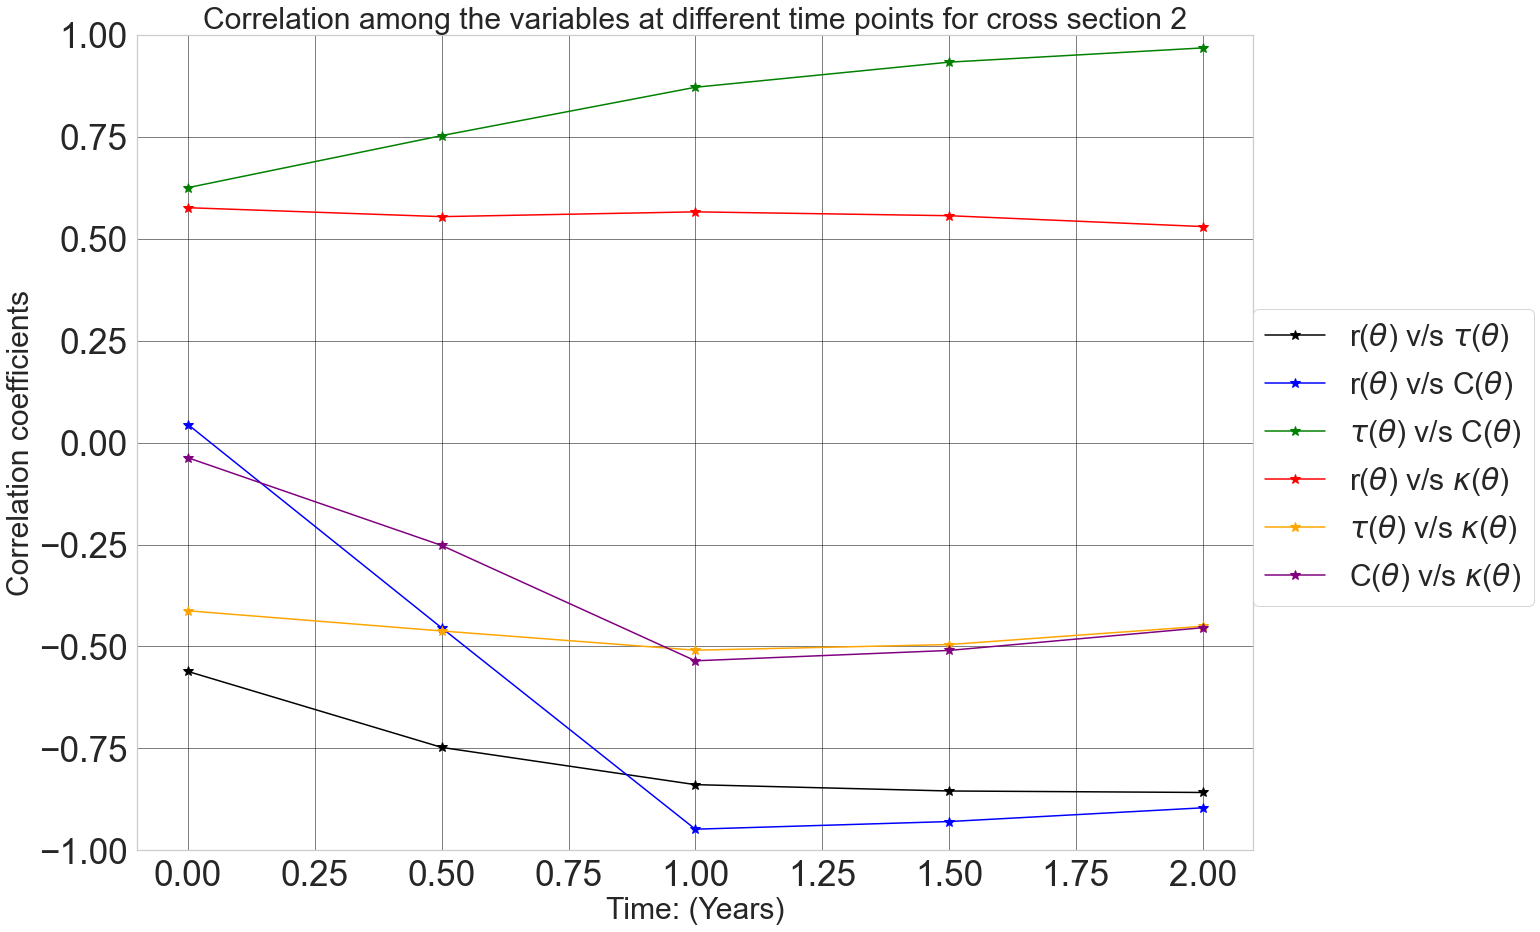

In [46]:
T = np.array([0, 0.5, 1.0, 1.5, 2.0])
plt.figure(figsize=(20,15)) 
plt.plot(T,rvstau, color='black', marker = '*', markersize=10, label='r($\\theta$) v/s $\\tau$($\\theta$)')
plt.plot(T,rvsc, color='blue', marker = '*', markersize=10, label='r($\\theta$) v/s C($\\theta$)')
plt.plot(T,tauvsc, color='green', marker = '*', markersize=10, label='$\\tau$($\\theta$) v/s C($\\theta$)')
plt.plot(T,rvskappa, color='red', marker = '*', markersize=10, label='r($\\theta$) v/s $\\kappa$($\\theta$)')
plt.plot(T,tauvskappa, color='orange', marker = '*', markersize=10, label='$\\tau$($\\theta$) v/s $\\kappa$($\\theta$)')
plt.plot(T,cvskappa, color='purple', marker = '*', markersize=10, label='C($\\theta$) v/s $\\kappa$($\\theta$)')
plt.xlabel('Time: (Years)',fontsize=30)
plt.ylabel('Correlation coefficients',fontsize=30)
plt.title('Correlation among the variables at different time points for cross section 2',fontsize=30)
plt.ylim([-1.0,1.0])
plt.tick_params(which='both', labelsize=35)
plt.grid(color='black',linewidth = 0.5)
plt.legend(loc=(1.0,0.3),fontsize=30)
plt.savefig('cs2corrcoeffsfordifftimes', bbox_inches='tight',dpi=85)
plt.show()

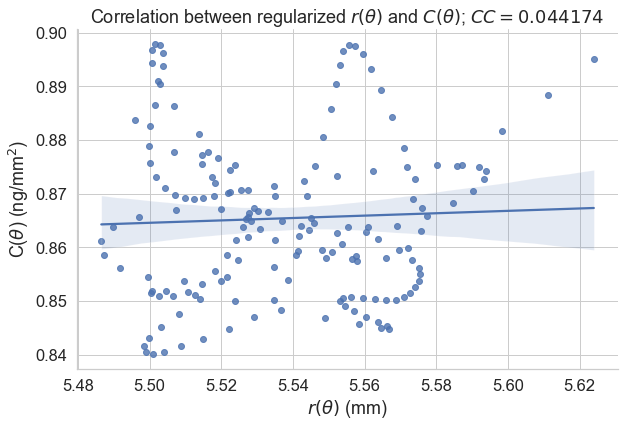

In [47]:
sns.set(font_scale = 1.5)  # 0 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and $C(\\theta)$; $CC=0.044174$')
plt.savefig('cs2rvscT0', bbox_inches='tight',dpi=300)

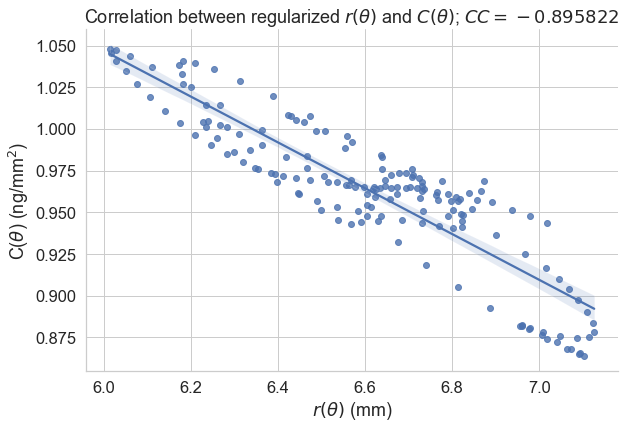

In [48]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and $C(\\theta)$; $CC=-0.895822$')
plt.savefig('cs2rvscT2', bbox_inches='tight',dpi=300)

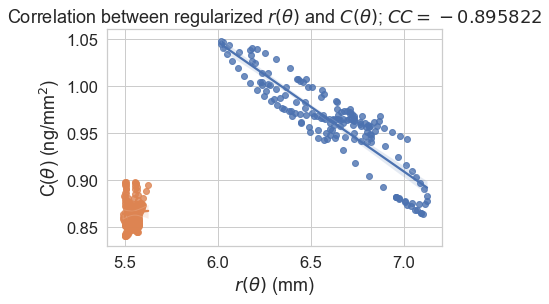

In [49]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.regplot(data = df_reg_99, x='r($\theta$)', y = 'C($\theta$)')
lm0=sns.regplot(data = df_reg_0, x='r($\theta$)', y = 'C($\theta$)')
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and $C(\\theta)$; $CC=-0.895822$')
plt.savefig('cs2rvscT2_same axes', bbox_inches='tight',dpi=300)

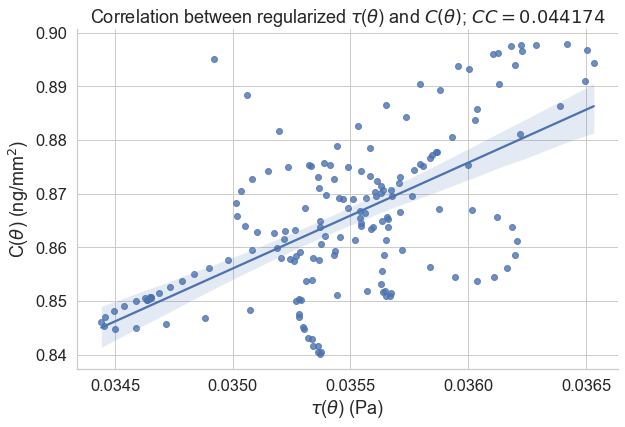

In [60]:
sns.set(font_scale = 1.5)  # 0 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='$\tau$($\theta)$', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$\\tau$($\\theta$) (Pa)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $\\tau$($\\theta$) and $C(\\theta)$; $CC=0.044174$')
plt.savefig('cs2tauvscT0', bbox_inches='tight',dpi=300)

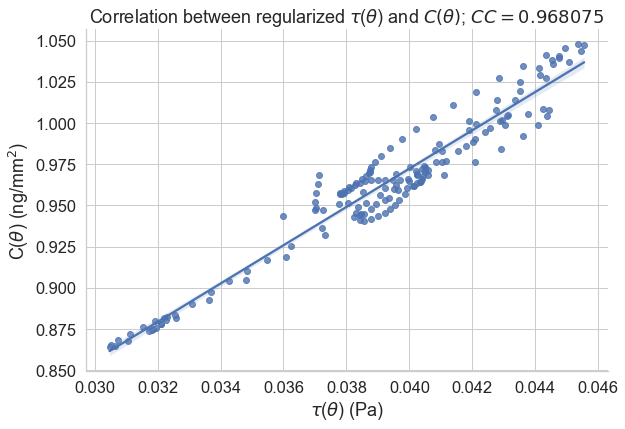

In [59]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='$\tau$($\theta)$', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$\\tau$($\\theta$) (Pa)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $\\tau$($\\theta$) and $C(\\theta)$; $CC=0.968075$')
plt.savefig('cs2tauvscT2', bbox_inches='tight',dpi=300)

In [57]:
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.858139    -0.895822   
$\tau$($\theta)$      -0.858139          1.000000     0.968075   
C($\theta$)           -0.895822          0.968075     1.000000   
$\kappa$($\theta)$     0.529923         -0.450429    -0.454103   

                    $\kappa$($\theta)$  
r($\theta$)                   0.529923  
$\tau$($\theta)$             -0.450429  
C($\theta$)                  -0.454103  
$\kappa$($\theta)$            1.000000